# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 594


In [3]:
print(weather_api_key)

18af5febd79fe2dcad03ee1893a690d4


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city#.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#6.2.6
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = city_weather["dt"]
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kelso
Processing Record 2 of Set 1 | susuman
Processing Record 3 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | chibougamau
Processing Record 7 of Set 1 | menongue
Processing Record 8 of Set 1 | vorkuta
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | xianshuigu
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | alo
Processing Record 15 of Set 1 | manakara
Processing Record 16 of Set 1 | alesund
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | ouani
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | vylkove
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | hadibu


Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | selfoss
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | chimore
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | verkhnevilyuysk
Processing Record 49 of Set 4 | quellon
Processing Record 50 of Set 4 | shar
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | tarboro
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | pandan
Processing Record 7 of Set 5 | kailua-kona
Processing Record 8 of Set 5 | lazaro cardenas
Processing Record 9 of Set 5 | george town
Processing Record 10 of Set 5 | aasiaat
Processing Record 11 of Set 5 | n'diareme limamoulaye
City not found. Skipping...
Processing Record 12 of Set 5 | usogorsk
Processing Record 13 of Set 5 | polyarnyy
Processing Record 14 of Set 5 | kadugli
Processing Record 15 of Set 5 | justo daract
Processing Record 16 of 

Processing Record 33 of Set 8 | wuxue
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | mizan teferi
Processing Record 37 of Set 8 | lovech
Processing Record 38 of Set 8 | noosa heads
Processing Record 39 of Set 8 | sault ste. marie
Processing Record 40 of Set 8 | tasqala
Processing Record 41 of Set 8 | pierre
Processing Record 42 of Set 8 | tejen
Processing Record 43 of Set 8 | happy valley-goose bay
Processing Record 44 of Set 8 | great falls
Processing Record 45 of Set 8 | petropavlovsk-kamchatsky
Processing Record 46 of Set 8 | hammerfest
Processing Record 47 of Set 8 | olot
Processing Record 48 of Set 8 | yangor
City not found. Skipping...
Processing Record 49 of Set 8 | fraga
Processing Record 50 of Set 8 | malango
Processing Record 1 of Set 9 | arraial do cabo
Processing Record 2 of Set 9 | newman
Processing Record 3 of Set 9 | aracataca
Processing Record 4 of Set 9 | markovo
Processing Record 5 of Set 9 | ar ruway

Processing Record 20 of Set 12 | tangalle
Processing Record 21 of Set 12 | catalao
Processing Record 22 of Set 12 | kruisfontein
Processing Record 23 of Set 12 | tolanaro
Processing Record 24 of Set 12 | bargarh
Processing Record 25 of Set 12 | libreville
Processing Record 26 of Set 12 | woods creek
Processing Record 27 of Set 12 | cowra
Processing Record 28 of Set 12 | qarqaraly
Processing Record 29 of Set 12 | juhaynah
Processing Record 30 of Set 12 | palikir - national government center
Processing Record 31 of Set 12 | nizhneudinsk
Processing Record 32 of Set 12 | lorengau
Processing Record 33 of Set 12 | wellington
Processing Record 34 of Set 12 | mirriah
Processing Record 35 of Set 12 | semibratovo
Processing Record 36 of Set 12 | kaa-khem
Processing Record 37 of Set 12 | nagqu
Processing Record 38 of Set 12 | argostolion
Processing Record 39 of Set 12 | hami
Processing Record 40 of Set 12 | fiambala
Processing Record 41 of Set 12 | debesy
Processing Record 42 of Set 12 | kaedi
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kelso,46.1468,-122.9084,38.62,90,100,7.00,US,1705686081
1,Susuman,62.7833,148.1667,-29.02,98,82,1.01,RU,1705686081
2,Jamestown,42.0970,-79.2353,26.24,83,100,6.91,US,1705685815
3,Waitangi,-43.9535,-176.5597,65.82,93,64,8.99,NZ,1705686082
4,Chibougamau,49.9168,-74.3659,-4.38,77,100,11.50,CA,1705686082


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
weather_dataframe = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kelso,46.1468,-122.9084,38.62,90,100,7.00,US,1705686081
1,Susuman,62.7833,148.1667,-29.02,98,82,1.01,RU,1705686081
2,Jamestown,42.0970,-79.2353,26.24,83,100,6.91,US,1705685815
3,Waitangi,-43.9535,-176.5597,65.82,93,64,8.99,NZ,1705686082
4,Chibougamau,49.9168,-74.3659,-4.38,77,100,11.50,CA,1705686082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

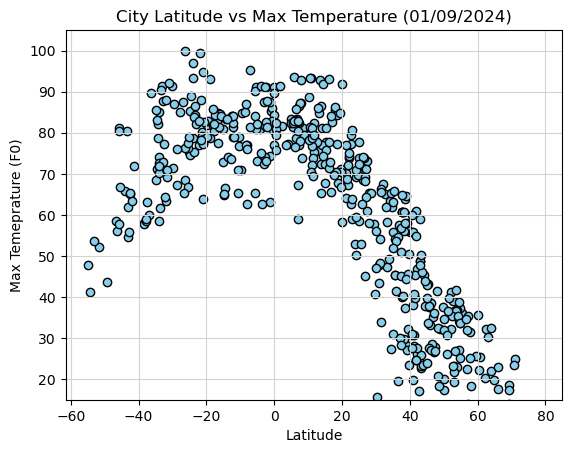

In [17]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs Max Temperature (01/09/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temeprature (F0)")
plt.ylim(15,105)
plt.grid(True, which="major", axis="both", linestyle="-", color="lightgrey")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

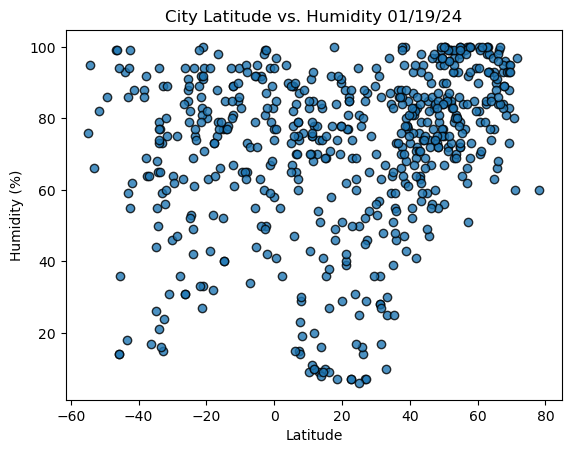

In [25]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(weather_dataframe["Lat"],
           weather_dataframe["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

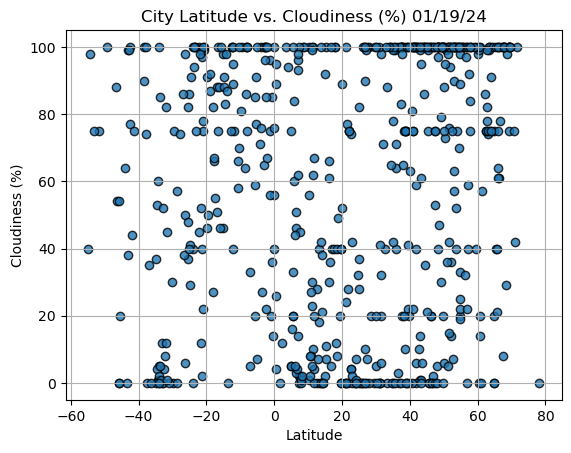

In [31]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(weather_dataframe["Lat"],
           weather_dataframe["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

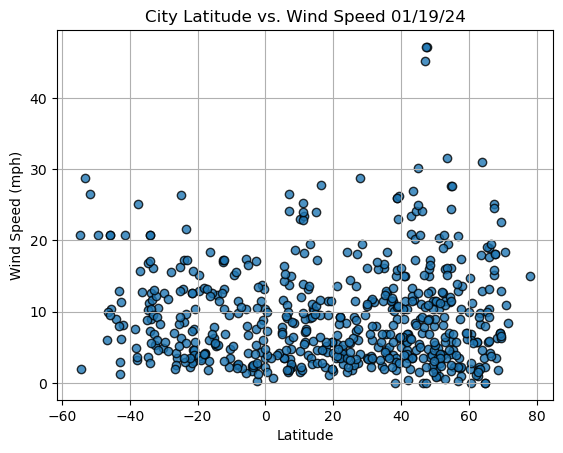

In [33]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(weather_dataframe["Lat"],
           weather_dataframe["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    
index13=city_data_df.loc[13]
index13
city_data_df['Lat']>=0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kelso,46.1468,-122.9084,38.62,90,100,7.00,US,1705686081
1,Susuman,62.7833,148.1667,-29.02,98,82,1.01,RU,1705686081
2,Jamestown,42.0970,-79.2353,26.24,83,100,6.91,US,1705685815
4,Chibougamau,49.9168,-74.3659,-4.38,77,100,11.50,CA,1705686082
6,Vorkuta,67.5000,64.0000,7.74,84,100,25.08,RU,1705686082


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kelso,46.1468,-122.9084,38.62,90,100,7.00,US,1705686081
1,Susuman,62.7833,148.1667,-29.02,98,82,1.01,RU,1705686081
2,Jamestown,42.0970,-79.2353,26.24,83,100,6.91,US,1705685815
4,Chibougamau,49.9168,-74.3659,-4.38,77,100,11.50,CA,1705686082
6,Vorkuta,67.5000,64.0000,7.74,84,100,25.08,RU,1705686082


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Waitangi,-43.9535,-176.5597,65.82,93,64,8.99,NZ,1705686082
5,Menongue,-14.6585,17.6910,66.54,85,83,5.14,AO,1705686082
7,Port-Aux-Francais,-49.3500,70.2167,43.74,86,100,20.76,TF,1705686083
11,Port Elizabeth,-33.9180,25.5701,74.10,79,0,20.71,ZA,1705686084
13,Manakara,-22.1333,48.0167,77.02,89,100,2.30,MG,1705686084


###  Temperature vs. Latitude Linear Regression Plot

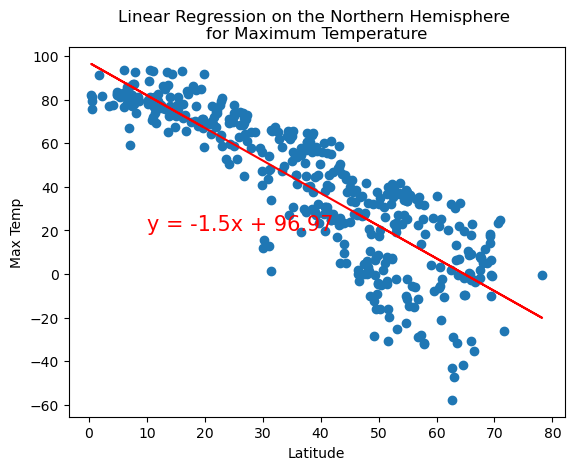

In [37]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,20))

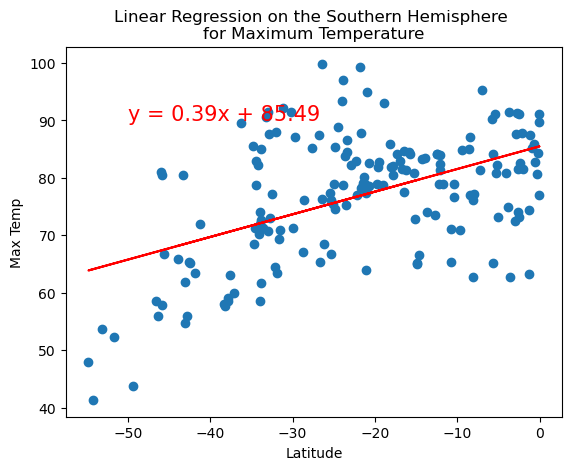

In [38]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

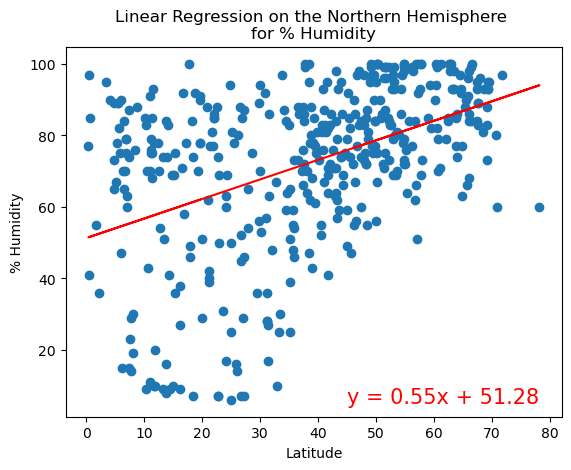

In [39]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(45,5))

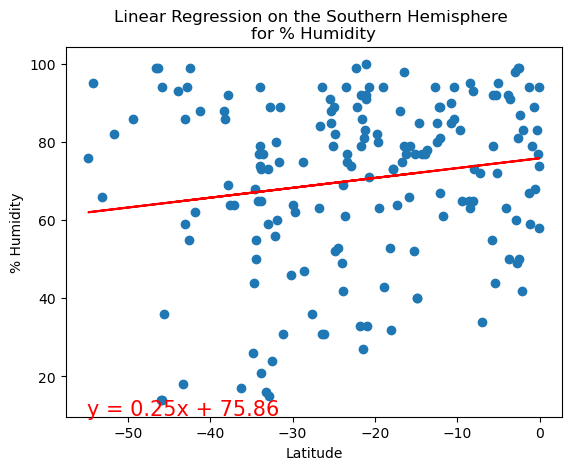

In [40]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

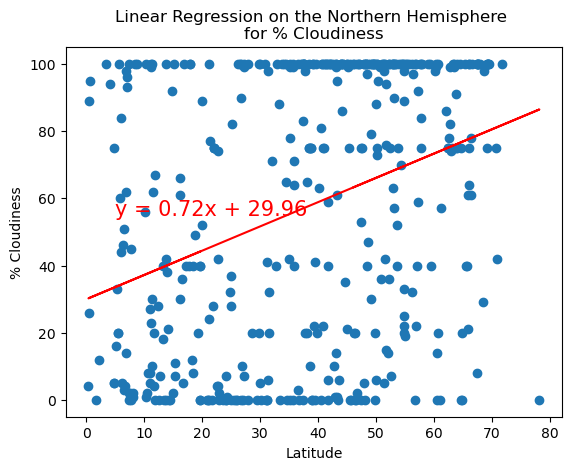

In [41]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(5,55))

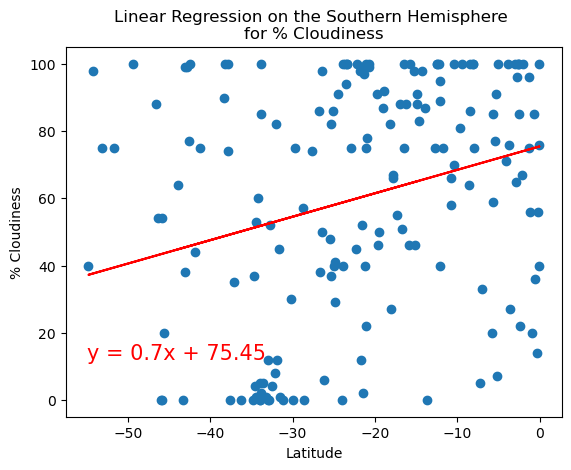

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

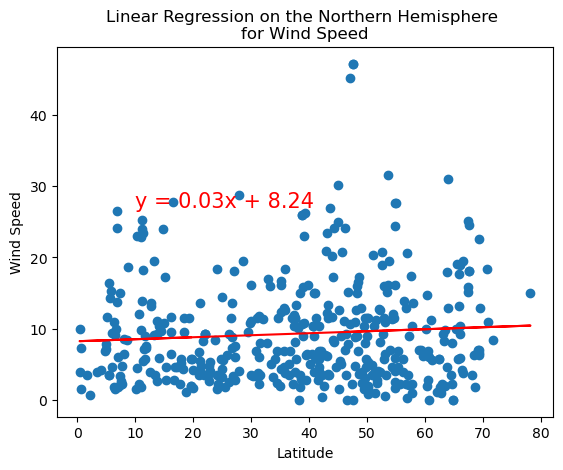

In [43]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,27))

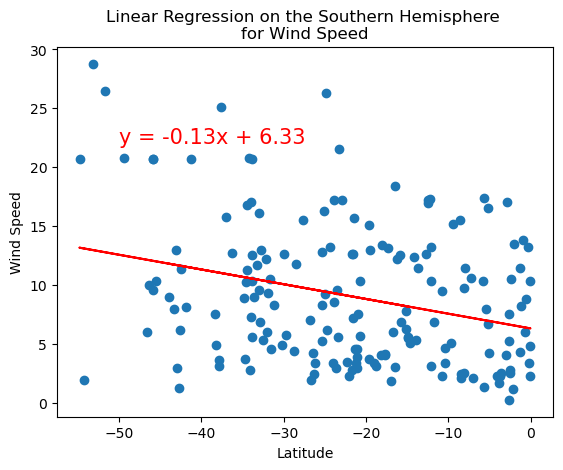

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,22))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#There is a negative linear relationship between the southern hemisphere wind speed and latitutde. So as the latitiutde goes from -50 toward zero the wind speed is decreasing. However
#For the Northern hemisphere, as the latitude increases from 0 to 100, there is no big effect on wind speed. 
#For the Southern hemisphere, as the latitiude goes from -50 to 0, the percentage of cloudiness and humidity is auctually increasing significantly as there is a positive correlation there. 
# For the northern hemisphere, as the latitude increased from 0 to 100, the temeprature decreased signfiicantly while the humdiity increased. This tells us that the higher the latitiude in the Northern hemisphere, the colder it will be which makes 
#sense as it is colder near the top of the planet due to shorter days and less sunlight.